# Clasificadores K means

Los clasificadores REALMENTE implementan modulos, pero estos modulos no se consideran algoritmos, sin embargo, la IA usa mas estadistica mientras que un clasificador si implementa algoritmos.

Veremos un ejemplo respecto a la tipificacion de personas, el algoritmo toma los valores como centros y los empieza a distribuir.

La segmentacion es hacia los mas cercanos

## Aprendizaje automatico (Machine Learning)

K. Means

In [1]:
import pandas as pd

In [2]:
ruta = "./public/csv/Mall_Customers-2.csv"

In [3]:
dataframe = pd.read_csv(ruta, index_col=0)

In [4]:
dataframe.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Si hay valores nulos, se pueden rellenar los valores nulos
# eliminarlos si no son necesarios y la muestra es grande
# puedo usar un cuartil para rellenar los valores nulos
# puedo usar la media, moda o mediana para rellenar los valores nulos

# renombrar columnas
dataframe.rename(columns={"Annual Income (k$)": "ingresos", "Spending Score (1-100)": "gastos", "Age": "edad", "Gender": "genero"}, inplace=True)
dataframe

,genero,edad,ingresos,gastos
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Analsiis exploratorio

In [7]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
ingresos,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
gastos,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [8]:
dataframe["genero"].value_counts()

genero
Female    112
Male       88
Name: count, dtype: int64

### Segmentacion tradicional

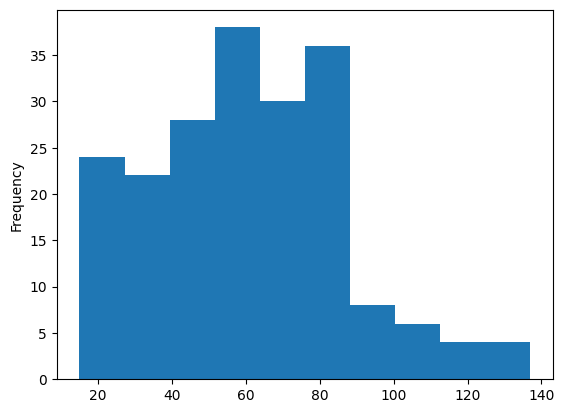

In [9]:
dataframe.ingresos.plot(kind="hist");

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

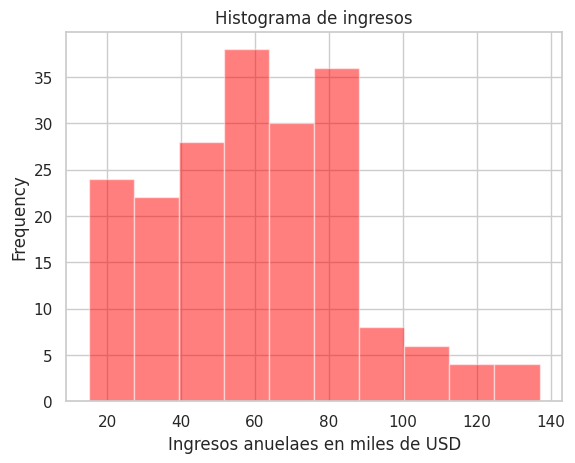

In [11]:
dataframe.ingresos.plot(kind="hist", color="red", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes en miles de USD");

**REGLAS A  SSEGUIR PARA CLASIFICAR DE FORMA TRADICIONAL**

- Ingreso < 50 *entonces* **ingreso bajo**
- 50 <= Ingreso <= 90 *entonces* **ingreso moderado**
- Ingreso > 90 *entonces* **ingreso alto**

In [12]:
import numpy as np

In [13]:
dataframe['Segmento'] = np.where(dataframe['ingresos'] >= 90, 'ingreso alto', np.where(dataframe['ingresos'] < 50, 'ingreso bajo', 'ingreso moderado'))
dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [14]:
dataframe.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [15]:
dataframe.groupby("Segmento")['ingresos'].describe()

,count,mean,std,min,25%,50%,75%,max
Segmento,,,,,,,,
ingreso alto,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
ingreso bajo,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
ingreso moderado,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


# Estandarizacion de datos

Vamos a preprocesar los datos para hacerlo de una manera mejor, usando medias estandar

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
columnas_a_escalar = [ 'edad', 'ingresos', 'gastos']
datos_a_escalar = dataframe.copy()

In [19]:
# hace la transformación de los datos y ajuste de las columnas conteniedas -> calculo de la media y desviación estandar
datos_a_escalar[columnas_a_escalar] = scaler.fit_transform(datos_a_escalar[columnas_a_escalar])

In [20]:
dataframe

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,19,15,39,ingreso bajo
2,Male,21,15,81,ingreso bajo
3,Female,20,16,6,ingreso bajo
4,Female,23,16,77,ingreso bajo
5,Female,31,17,40,ingreso bajo
...,...,...,...,...,...
196,Female,35,120,79,ingreso alto
197,Female,45,126,28,ingreso alto
198,Male,32,126,74,ingreso alto


In [21]:
datos_a_escalar

,genero,edad,ingresos,gastos,Segmento
CustomerID,,,,,
1,Male,-1.424569,-1.738999,-0.434801,ingreso bajo
2,Male,-1.281035,-1.738999,1.195704,ingreso bajo
3,Female,-1.352802,-1.700830,-1.715913,ingreso bajo
4,Female,-1.137502,-1.700830,1.040418,ingreso bajo
5,Female,-0.563369,-1.662660,-0.395980,ingreso bajo
...,...,...,...,...,...
196,Female,-0.276302,2.268791,1.118061,ingreso alto
197,Female,0.441365,2.497807,-0.861839,ingreso alto
198,Male,-0.491602,2.497807,0.923953,ingreso alto


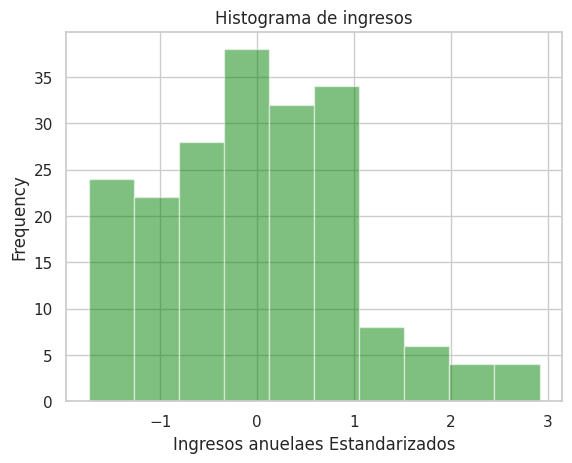

In [22]:
datos_a_escalar.ingresos.plot(kind="hist", color="green", alpha=0.5)
plt.title("Histograma de ingresos")
plt.xlabel("Ingresos anuelaes Estandarizados");

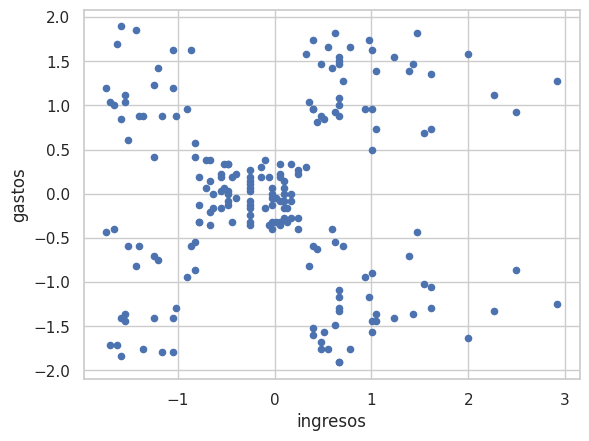

In [23]:
# cluseter columns
columnas_a_segmentar = ['ingresos', 'gastos']
datos_a_escalar.plot(kind="scatter", x=columnas_a_segmentar[0], y=columnas_a_segmentar[1]);

## AHORA CON EL USO DE K-MEANS

In [24]:
from sklearn.cluster import KMeans

In [25]:
modelo = KMeans(n_clusters=5, random_state=12)

In [26]:
# ejecutamos el modelo
modelo.fit(datos_a_escalar[columnas_a_segmentar])

KMeans(n_clusters=5, random_state=12)

In [27]:
# ahora en una columna segmento-2 vamos a colocar el resultado de la prediccion que hizo k means

datos_a_escalar['Segmento2'] = modelo.predict(datos_a_escalar[columnas_a_segmentar])

In [28]:
datos_a_escalar.Segmento.value_counts()

Segmento
ingreso moderado    106
ingreso bajo         72
ingreso alto         22
Name: count, dtype: int64

In [29]:
datos_a_escalar.Segmento2.value_counts()

Segmento2
1    81
3    39
2    35
0    23
4    22
Name: count, dtype: int64